# Noise removal filters
Filter such as `mean`, `median` and `Gaussian` allow removing noise from images.

We start with a single plane of the MRT example data set which is pretty noisy and zoom in.

In [1]:
import numpy as np
from pyclesperanto_prototype import imshow
from skimage.filters import gaussian
from skimage import filters
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.io import imread

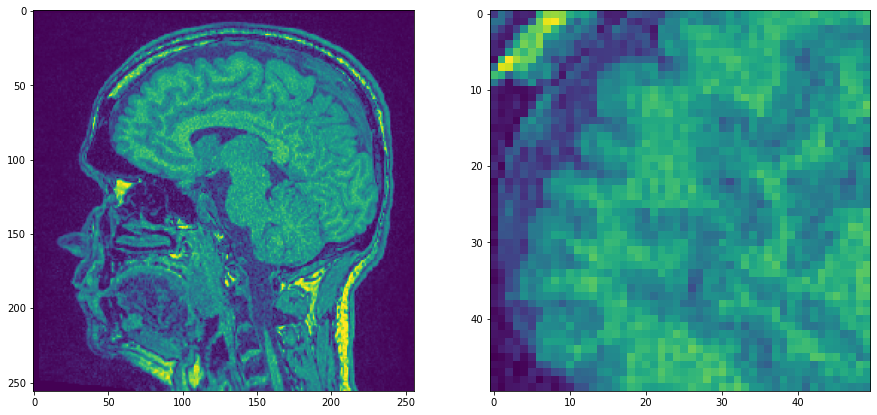

In [2]:
# open dataset and extract single plane
noisy_mri = imread('../../data/Haase_MRT_tfl3d1.tif')[90]

# zoom in by cropping a part out
noisy_mri_zoom = noisy_mri[50:100, 50:100]

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(noisy_mri)
axs[1].imshow(noisy_mri_zoom)

Now we apply three filters and compare resulting images.

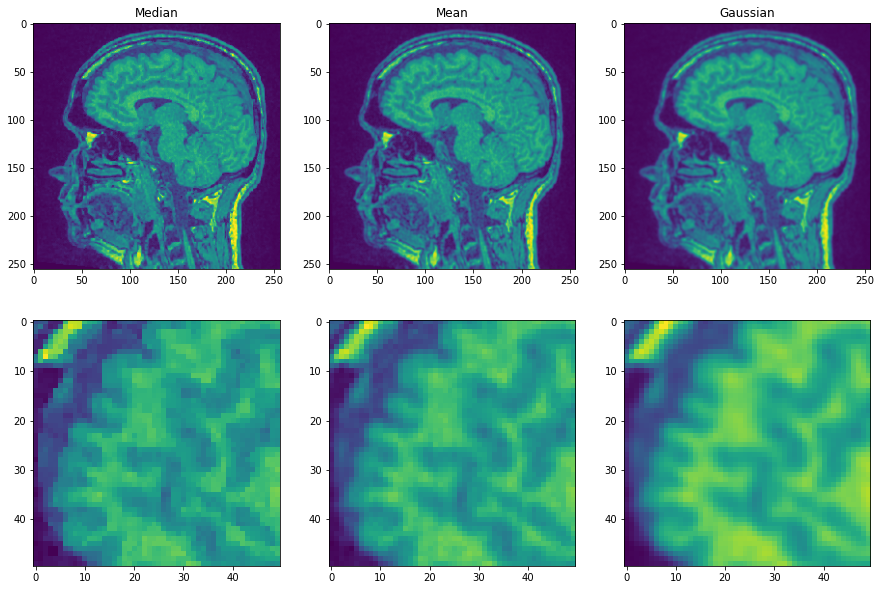

In [3]:
median_filtered = filters.median(noisy_mri, disk(1))
mean_filtered = filters.rank.mean(noisy_mri, disk(1))
gaussian_filtered = filters.gaussian(noisy_mri, sigma=1)

fig, axs = plt.subplots(2, 3, figsize=(15,10))

# first row
axs[0, 0].imshow(median_filtered)
axs[0, 0].set_title("Median")
axs[0, 1].imshow(mean_filtered)
axs[0, 1].set_title("Mean")
axs[0, 2].imshow(gaussian_filtered)
axs[0, 2].set_title("Gaussian")

# second row
axs[1, 0].imshow(median_filtered[50:100, 50:100])
axs[1, 1].imshow(mean_filtered[50:100, 50:100])
axs[1, 2].imshow(gaussian_filtered[50:100, 50:100])


You may agree, that the first image shows edges more prominently than the other two. This is because the [median filter is edge preserving](https://en.wikipedia.org/wiki/Median_filter).